<a href="https://colab.research.google.com/github/NuchPunnawichP/IoT__CU/blob/main/4_2_Classify_number_of_hand_writing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(x_test,  y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

savepath = "num_reader.h5"
model.save(savepath)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8266 - loss: 4.2927
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9262 - loss: 0.3720
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9401 - loss: 0.2441
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9544 - loss: 0.1678
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9614 - loss: 0.1336
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9478 - loss: 0.1953


Test loss: 0.1679053157567978
Test accuracy: 0.9544000029563904


Processed image shape: (1, 28, 28)


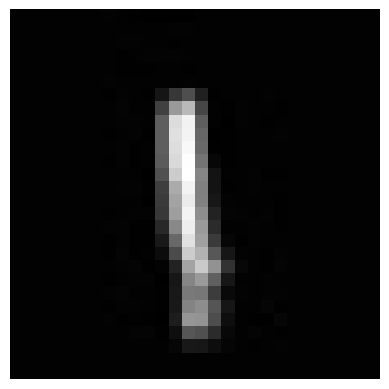

In [24]:
import numpy as np
import cv2
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.imagenet_utils import decode_predictions

url = "https://raw.githubusercontent.com/NuchPunnawichP/IoT__CU/main/Assignment4/Testing_image/1.jpg"

response = requests.get(url, stream=True)
response.raise_for_status()

image_data = np.asarray(bytearray(response.content), dtype=np.uint8)
input_image = cv2.imdecode(image_data, cv2.IMREAD_GRAYSCALE)

input_image_resized = cv2.resize(input_image, (28, 28))

input_image_processed = cv2.bitwise_not(input_image_resized)

input_image_batch = np.expand_dims(input_image_processed, axis=0)

print(f"Processed image shape: {input_image_batch.shape}")

plt.imshow(input_image_processed, cmap='gray')
plt.axis('off')
plt.show()


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Raw Predictions: [[5.3278747e-08 9.9854386e-01 5.3499732e-04 6.0345308e-05 1.5164349e-05
  5.6922686e-06 4.9061418e-05 1.6589105e-07 7.9053413e-04 2.7007476e-07]]
Predicted Class: 1


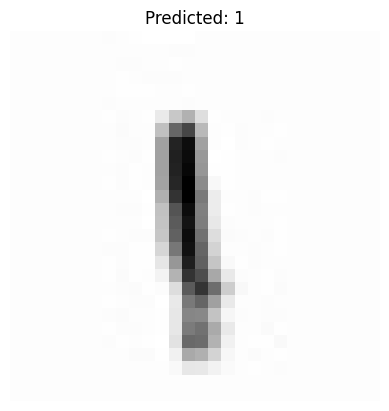

In [25]:
loadpath = "/content/num_reader.h5"
Answer = "Unknown"

try:
    resnet_model = tf.keras.models.load_model(loadpath)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model from {loadpath}: {e}")
    resnet_model = None

if resnet_model is not None:
    try:
        predictions = resnet_model.predict(input_image_batch)
        print("Raw Predictions:", predictions)

        predicted_class = np.argmax(predictions, axis=-1)
        Answer = str(predicted_class[0])
        print(f"Predicted Class: {Answer}")
    except Exception as e:
        print(f"Error during prediction: {e}")
else:
    print("Unable to make predictions because the model could not be loaded.")

plt.imshow(input_image_resized, cmap='gray')
plt.title(f"Predicted: {Answer}")
plt.axis('off')
plt.show()
